# <span style="color:brown">KNN - Classify The Animal Type
  - The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the ZOO datasets

In [1]:
import pandas as pd

In [2]:
zoo = pd.read_csv(r'C:\Users\Aabshaar\Downloads\KNN\KNN\Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# we have 1 onject datatype in our dataset.

# Task1. Analyse the data using the visualizations

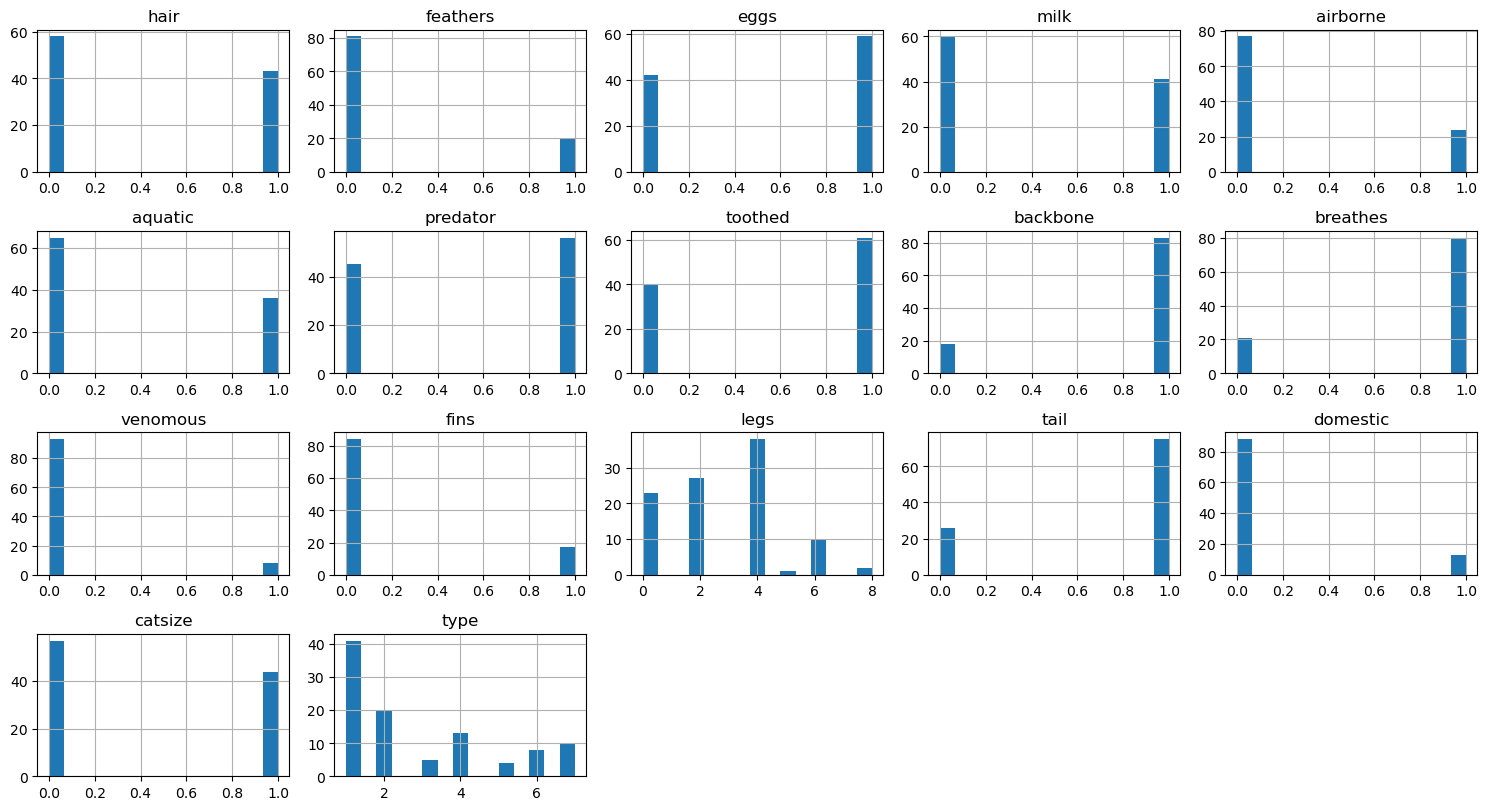

In [7]:
# Ploting histograms for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = zoo.select_dtypes(include=['int64']).columns
zoo[numerical_columns].hist(bins=15, figsize=(15, 12), layout=(6, 5))
plt.tight_layout()
plt.show()


1. Count Plots for Binary Columns

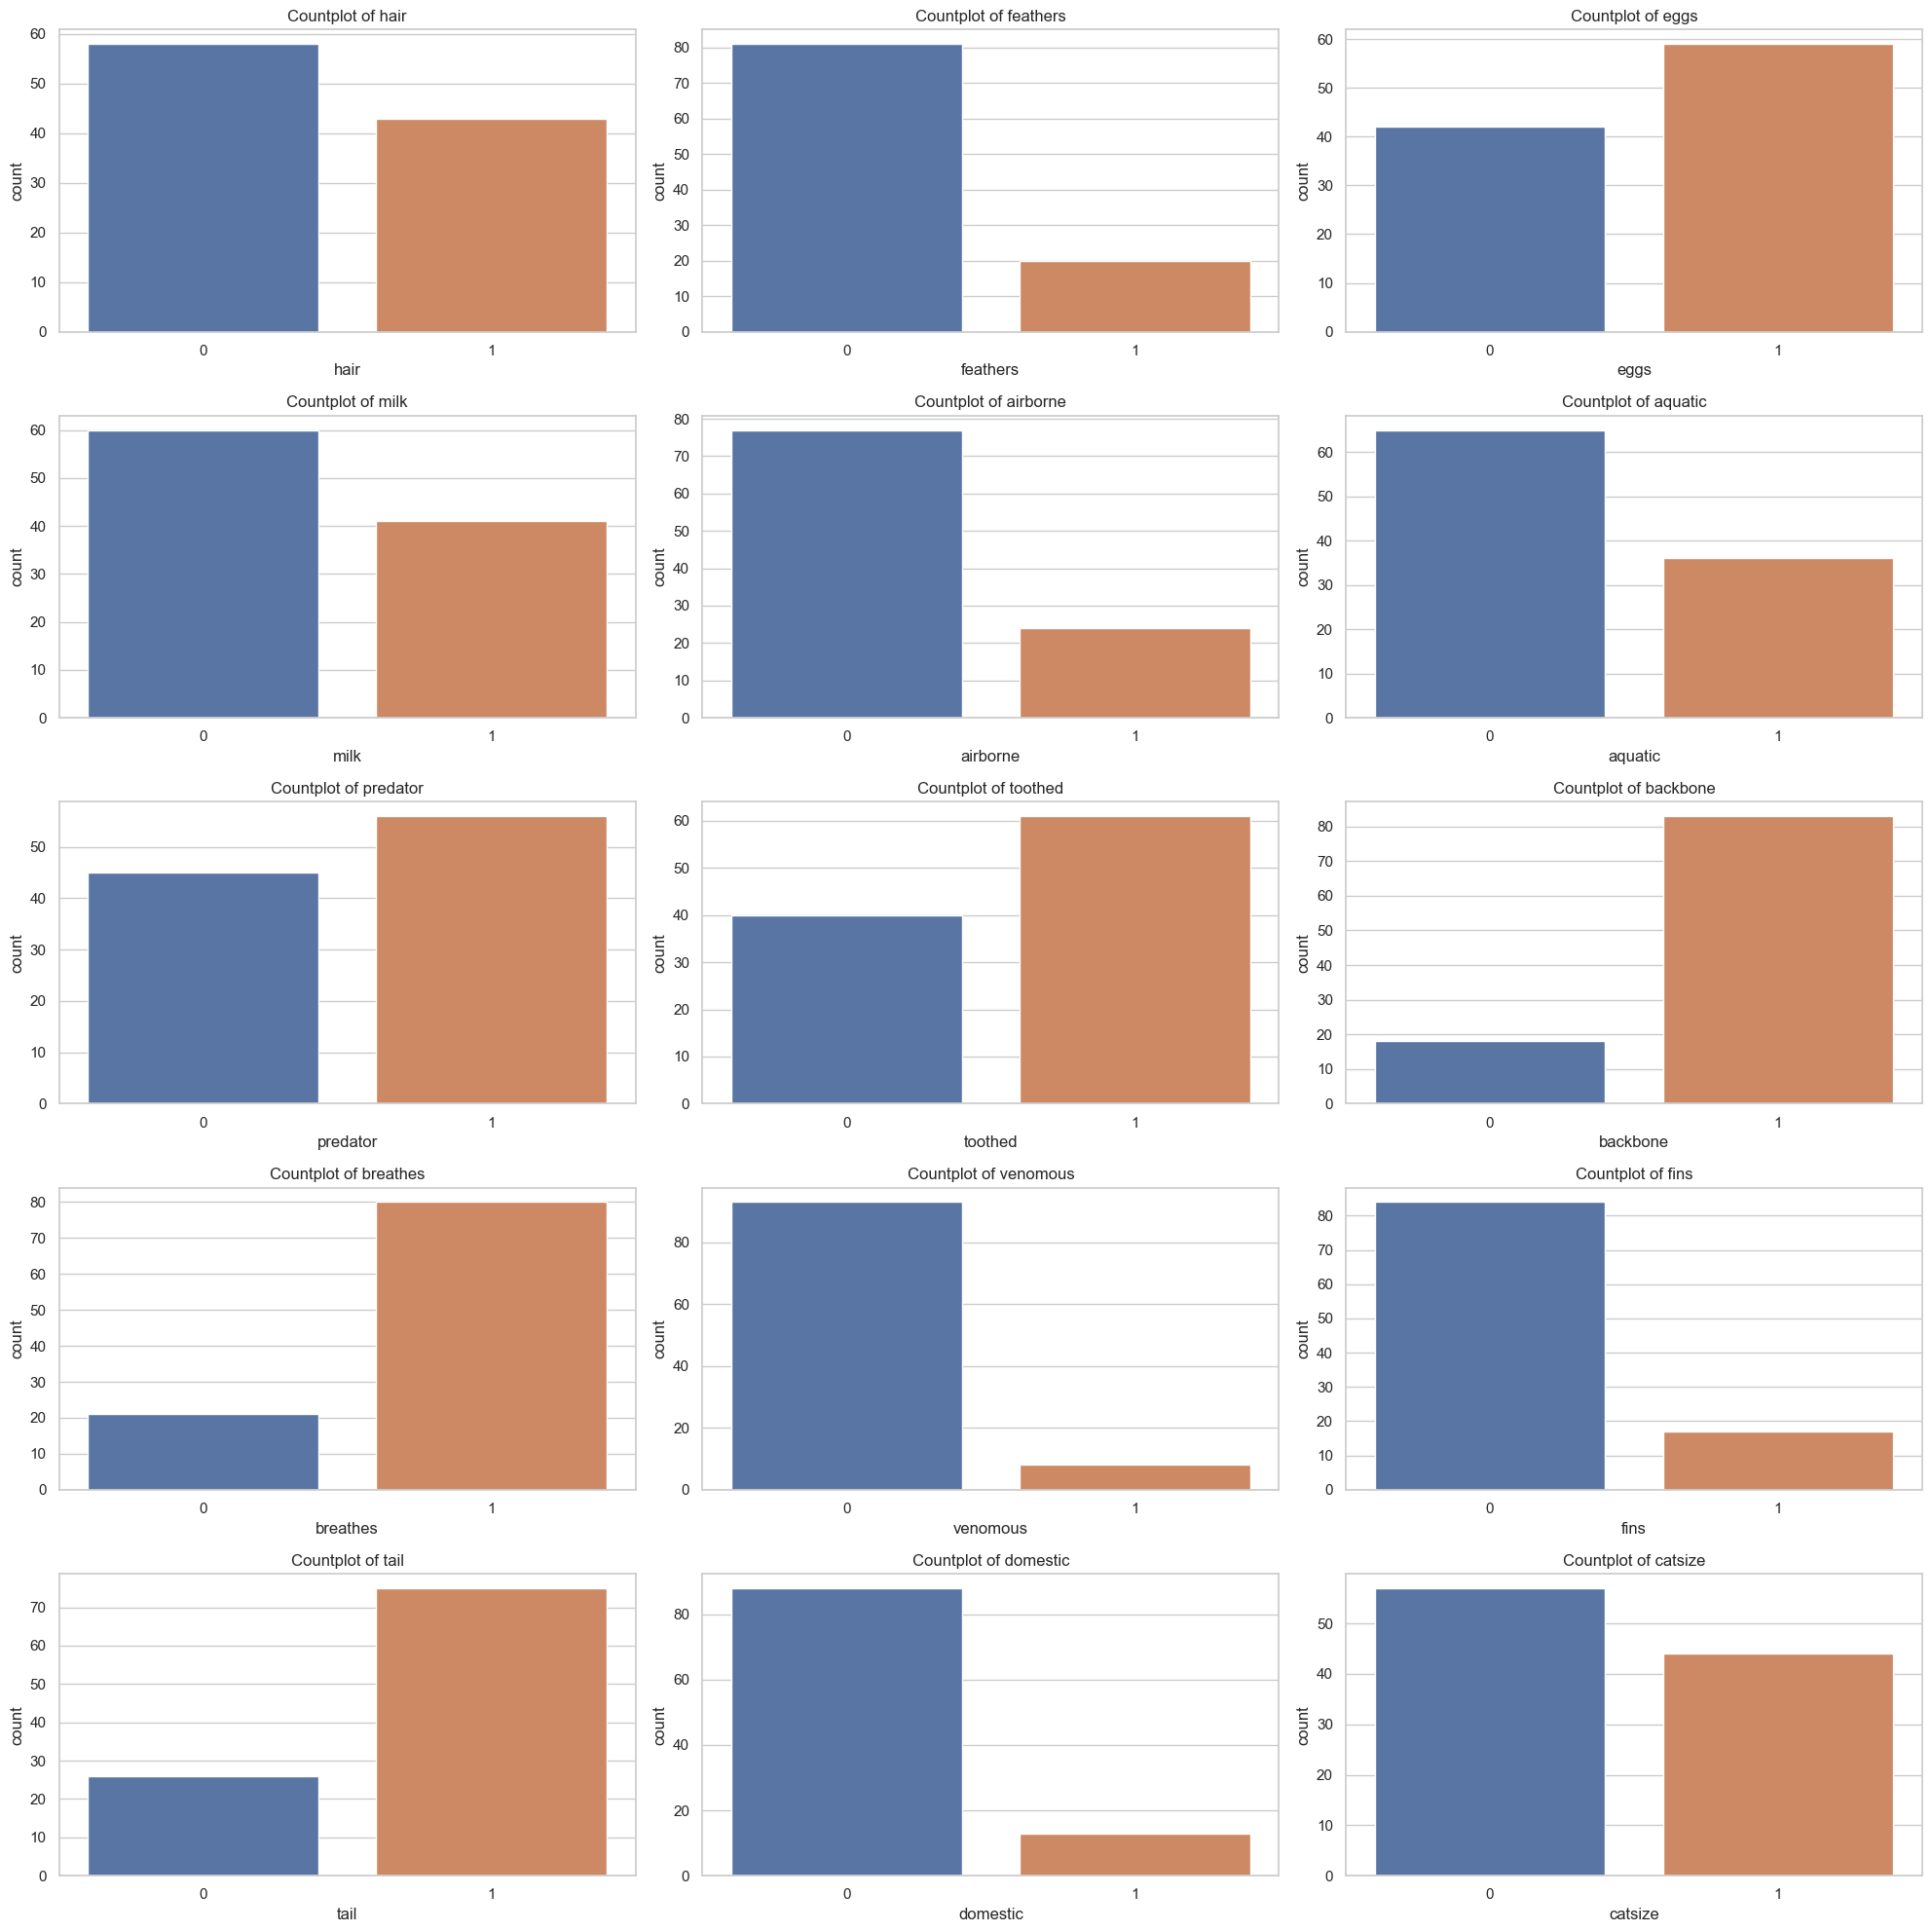

In [8]:
# Setting up Seaborn for better aesthetics
sns.set(style="whitegrid")

# List of binary columns
binary_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 
                  'predator', 'toothed', 'backbone', 'breathes', 'venomous', 
                  'fins', 'tail', 'domestic', 'catsize']

# Plotting count plots for binary columns
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for idx, col in enumerate(binary_columns):
    sns.countplot(x=col, data=zoo, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(f'Countplot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()


2. Histogram for the Numerical Column (legs)

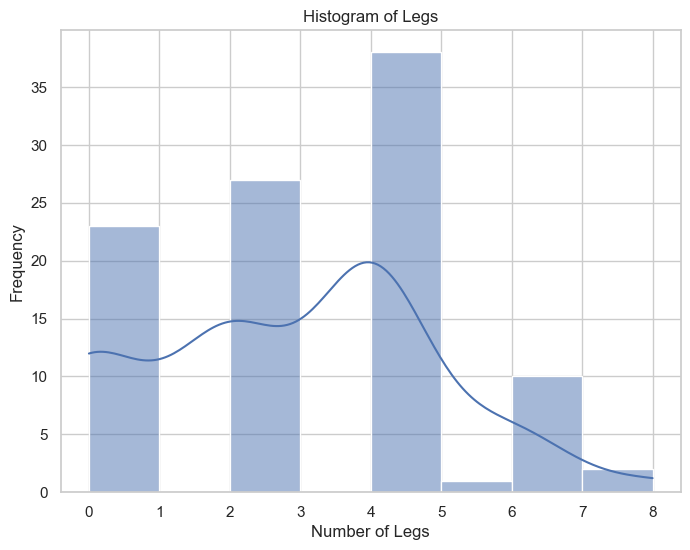

In [9]:
# Histogram for the numerical column 'legs'
plt.figure(figsize=(8, 6))
sns.histplot(zoo['legs'], bins=8, kde=True)
plt.title('Histogram of Legs')
plt.xlabel('Number of Legs')
plt.ylabel('Frequency')
plt.show()


3. Bar Plot for the Categorical Column (animal name)


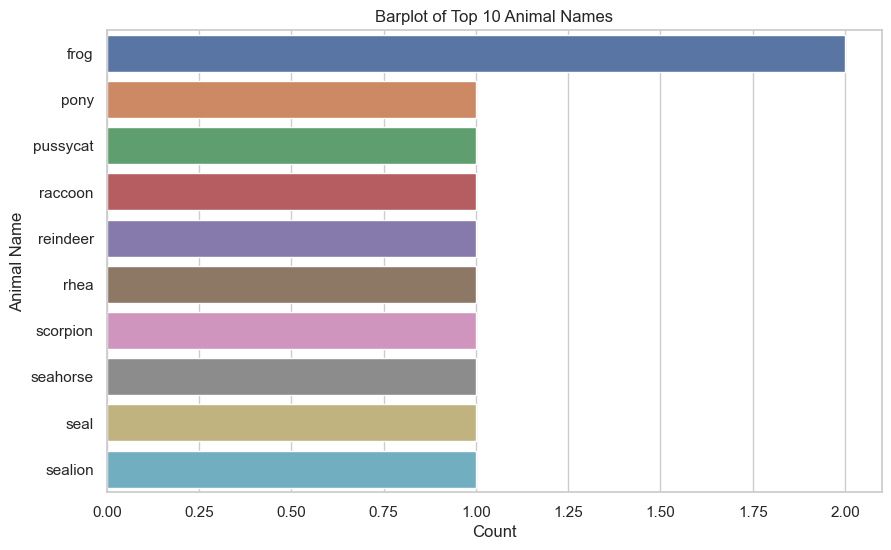

In [10]:
# Bar plot for the categorical column 'animal name'
top_animal_names = zoo['animal name'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(y='animal name', data=zoo[zoo['animal name'].isin(top_animal_names)])
plt.title('Barplot of Top 10 Animal Names')
plt.xlabel('Count')
plt.ylabel('Animal Name')
plt.show()



4. Correlation Heatmap

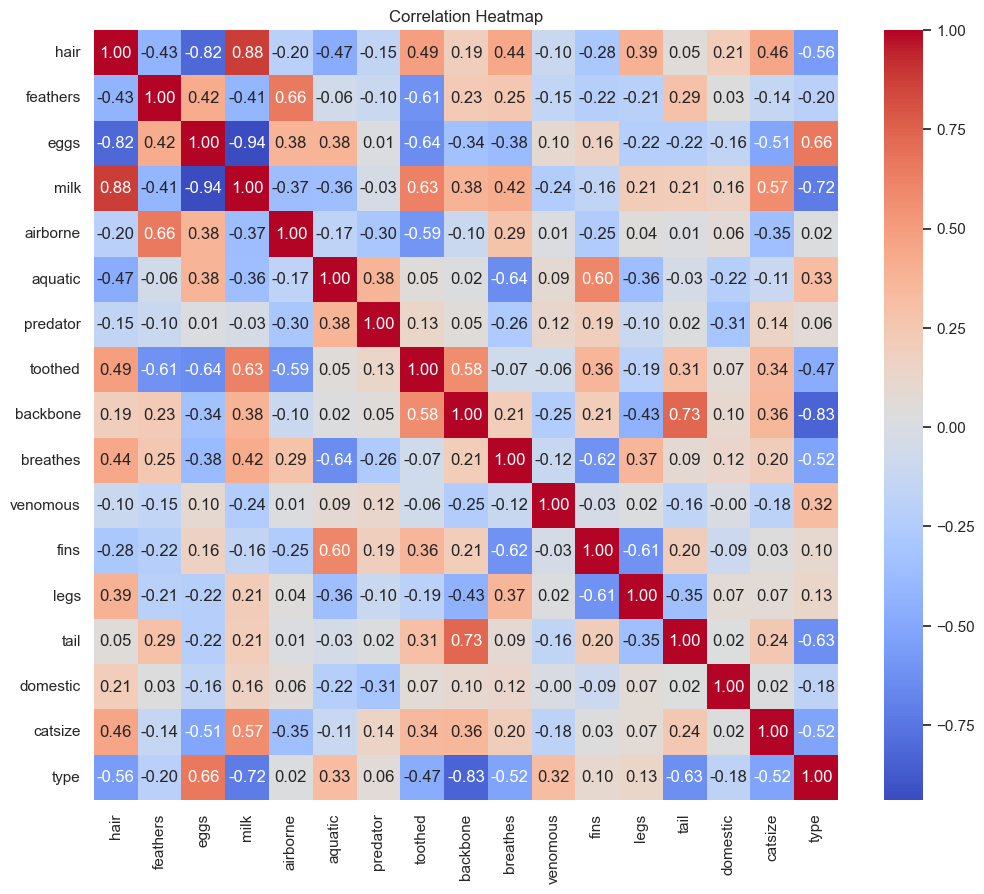

In [11]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 10))
corr = zoo.drop(columns=['animal name']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Task2. Preprocess the data by handling missing values & Outliers, if any.

In [12]:
#finding missing values

zoo.isnull().sum()[zoo.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
# we don't have any nulls/missing value in our dataset

In [ ]:
#obj to int

In [13]:
zoo.select_dtypes(include='object').columns

Index(['animal name'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

zoo[zoo.select_dtypes(include = 'object').columns] = zoo[zoo.select_dtypes(include = 'object').columns] .apply(le.fit_transform)


In [15]:
zoo.select_dtypes(include='object').columns

Index([], dtype='object')

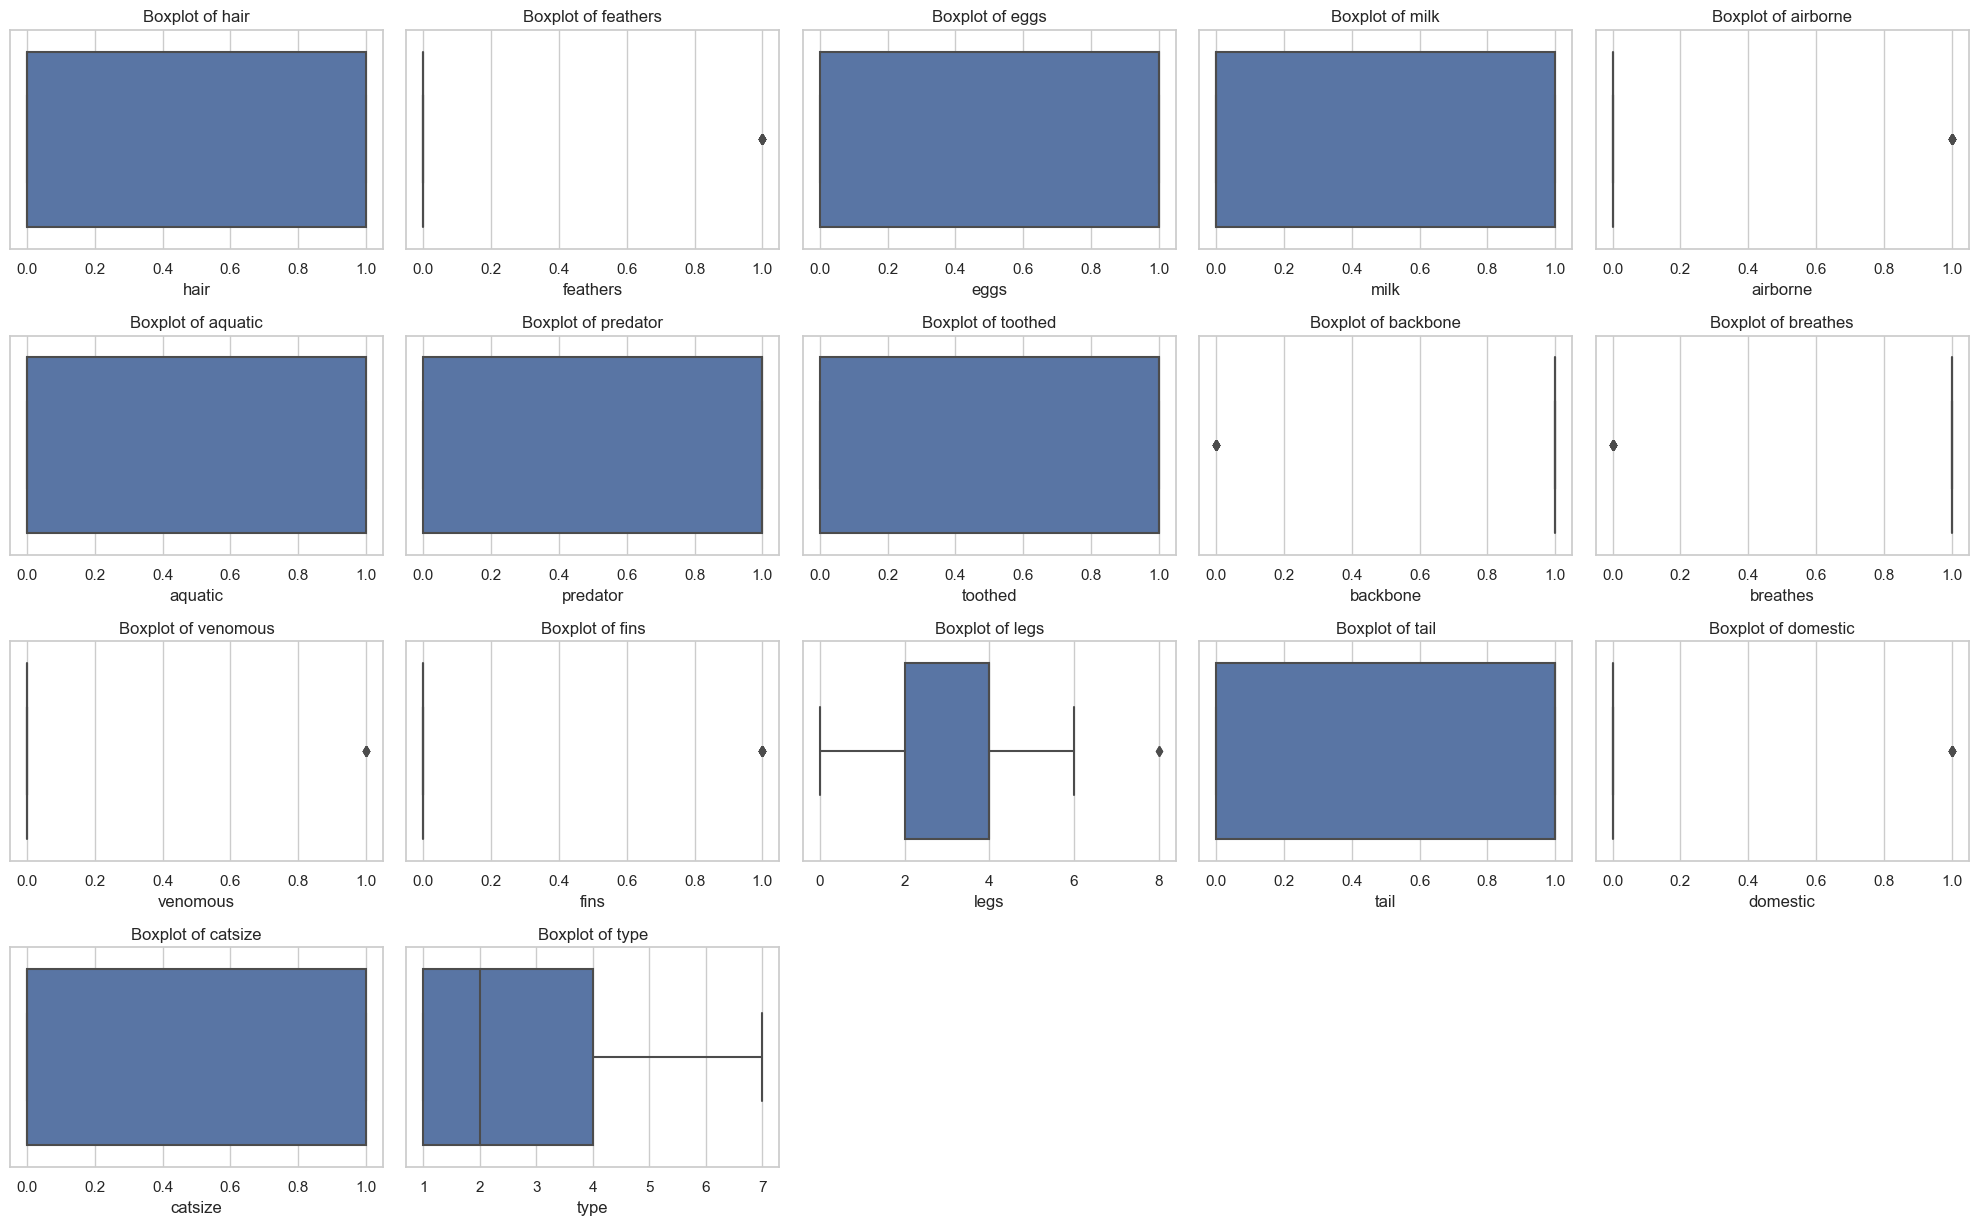

In [16]:
#finding outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=zoo[col])  # Pass the column as a keyword argument
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# OBSERVATION

# Variables with Outliers:

## Feathers:
There is an outlier at the value 1.
## Airborne:
There is an outlier at the value 1.
## Venomous:
There is an outlier at the value 1.
## Fins:
There is an outlier at the value 1.
## Legs:
There is an outlier at the value 8.
## Backbone:
There is an outlier at the value 0.
## Breathes:
There is an outlier at the value 0.


# Variables without Outliers:
# Hair, Eggs, Milk, Aquatic, Predator, Toothed, Tail, Domestic, Catsize:
- These variables do not show any outliers as they are binary variables and the boxplots are filled completely.

In [17]:
#removing outliers
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'zoo' is your dataframe
columns_with_outliers = ['feathers', 'airborne', 'venomous', 'fins', 'legs', 'backbone', 'breathes']

# Calculate IQR and filter out the outliers for each specified column
for col in columns_with_outliers:
    Q1 = zoo[col].quantile(0.25)
    Q3 = zoo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    zoo = zoo[(zoo[col] >= lower_bound) & (zoo[col] <= upper_bound)]

# # Plot boxplots for the numerical columns again to show outliers are removed
# plt.figure(figsize=(15, 12))

# for i, col in enumerate(columns_with_outliers, 1):
#     plt.subplot(4, 2, i)
#     zoo.boxplot(column=col)
#     plt.title(f'Boxplot of {col}')

# plt.tight_layout()
# plt.show()



# Explaination
- For each column with outliers, we have calculated the first quartile (Q1) and the third quartile (Q3) and then computed the interquartile range (IQR).
- We then determine the lower and upper bounds for identifying outliers.
- Where the values in the specified column are outside the calculated bounds for that we have filter the dataframe to exclude rows


# Task3. Split the dataset into training and testing sets (80% training, 20% testing).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#finding Target Var column index
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

# Feature columns
train = zoo.drop(columns=['animal name', 'type'])

# Target column
test = zoo['type']

# Split the data
train_x, test_x, train_y, test_y = train_test_split(train, test, test_size=0.2, random_state=42)


- Feature Columns: All columns except animal name and type.
- Target Column: type.

# Task4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(train_x, train_y)         #model build
pred = knn.predict(test_x)        #prediction

C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Task 5: Choosing an appropriate distance metric and value for K.

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [25]:
acc_list = []           # Creating an empty list to store accuracy for each value of k

for k in range(1, 10):  # For loop to iterate over a range of k values from 1 to 9
    knn = KNeighborsClassifier(n_neighbors=k)     # Initialize the k-NN classifier with the current value of k
    knn.fit(train_x, train_y)                     # Train the k-NN classifier on the training data
    pred_knn = knn.predict(test_x)                # Predict the labels for the test data
    tab = confusion_matrix(test_y, pred_knn)      # Create a confusion matrix to compare predicted and actual labels
    acc = tab.diagonal().sum() * 100 / tab.sum()  # Calculate the accuracy from the confusion matrix
    acc_list.append(acc)                          # Append the calculated accuracy to the acc_list

best_k = np.argmax(acc_list) + 1  # Find the value of k that has the highest accuracy
best_acc = acc_list[best_k - 1]  # Get the best accuracy corresponding to the best k


print("The best value of K is :", best_k)  # Print the best value of k
print("Accuracy for the best K is :", best_acc)  # Print the accuracy for the best k


The best value of K is : 1
Accuracy for the best K is : 87.5


C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

# Task 6: Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [26]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(test_y, pred)
precision = precision_score(test_y, pred, average='weighted')
recall = recall_score(test_y, pred, average='weighted')
f1 = f1_score(test_y, pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(test_y, pred))

Accuracy: 0.75
Precision: 0.5625
Recall: 0.75
F1 Score: 0.6428571428571428

Classification Report:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metri

# Task 7: Visualize the decision boundaries of the classifier.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
zoo = pd.read_csv(r'C:\Users\Aabshaar\Downloads\KNN\KNN\Zoo.csv')

# Feature columns (droping 'animal name' as it's not a feature, and 'type' as it's the target)
X = zoo.drop(columns=['animal name', 'type'])

# Target column
y = zoo['type']

# Spliting the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
len(train_x)

80

In [29]:
# Determining the appropriate value for n_neighbors
n_neighbors = min(len(train_x), 5)  # Ensure n_neighbors is not greater than the number of samples

- Ensuring that n_neighbors does not exceed the number of training samples avoids errors and ensures the k-NN algorithm functions correctly.
- Setting a reasonable default (5 in this case) provides a balance between smoothing the classification results and keeping the decision boundaries more localized.

C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defin

Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.8957902001380263

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



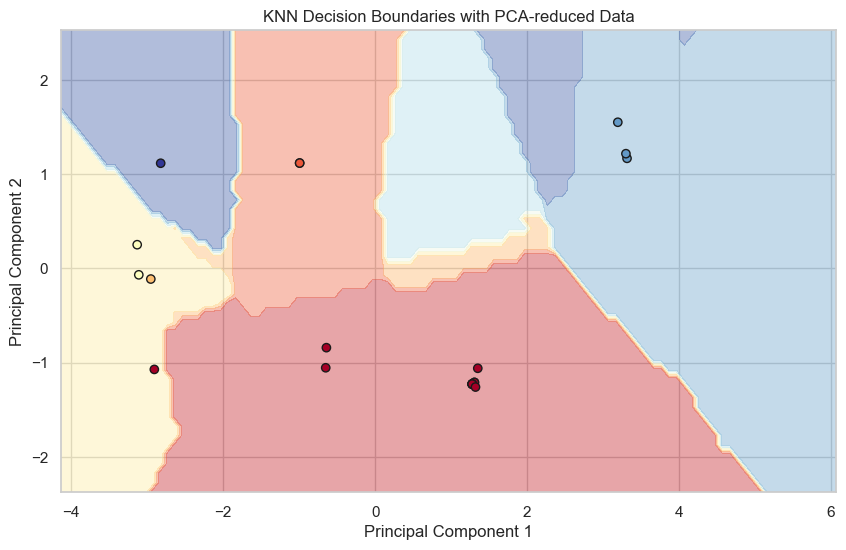

In [30]:
# Initialize the KNN classifier with Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')

# Train the model
knn.fit(train_x, train_y)

# Predict on the test set
test_pred = knn.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, test_pred)
precision = precision_score(test_y, test_pred, average='weighted')
recall = recall_score(test_y, test_pred, average='weighted')
f1 = f1_score(test_y, test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(test_y, test_pred))

# Visualization of decision boundaries (only possible in 2D or 3D)
# We'll use PCA to reduce dimensions to 2D for visualization purposes

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Splitting the reduced data again
train_x_reduced, test_x_reduced, train_y_reduced, test_y_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain the KNN model on reduced data
knn.fit(train_x_reduced, train_y_reduced)

# Create a mesh grid for plotting
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(test_x_reduced[:, 0], test_x_reduced[:, 1], c=test_y_reduced, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.title('KNN Decision Boundaries with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# - Thank you!

# -----------------------------------------------------------------------------------------------------------------